# Pandas to arrays

https://pythonguides.com/convert-pandas-dataframe-to-numpy-array/

In [2]:
import pandas as pd

In [3]:
csv = "ext_array.csv"
df = pd.read_csv(csv)
df.head()

,5.000000,5.000000.1,595.000000
0,15.0,5.0,595.0
1,5.0,15.0,595.0
2,25.0,5.0,595.0
3,35.0,5.0,595.0
4,45.0,5.0,595.0


In [4]:
df.describe()

,5.000000,5.000000.1,595.000000
count,45245.000000,45245.000000,45245.000000
mean,360.784507,402.265554,780.555752
std,265.690329,272.467989,114.513666
min,5.000000,5.000000,585.000000
25%,115.000000,155.000000,685.000000
50%,345.000000,395.000000,765.000000
75%,595.000000,635.000000,855.000000
max,835.000000,845.000000,1045.000000


In [5]:
x = df.to_numpy()

In [6]:
x.shape, x.size, x.ndim

((45245, 3), 135735, 2)

In [35]:
xx = x[:,0]
yy = x[:,1]
zz = x[:,2]

b = np.reshape(x, (45245, 3, -1)) 

In [38]:
b

array([[[ 15.],
        [  5.],
        [595.]],

       [[  5.],
        [ 15.],
        [595.]],

       [[ 25.],
        [  5.],
        [595.]],

       ...,

       [[665.],
        [845.],
        [905.]],

       [[  5.],
        [845.],
        [685.]],

       [[305.],
        [305.],
        [895.]]])

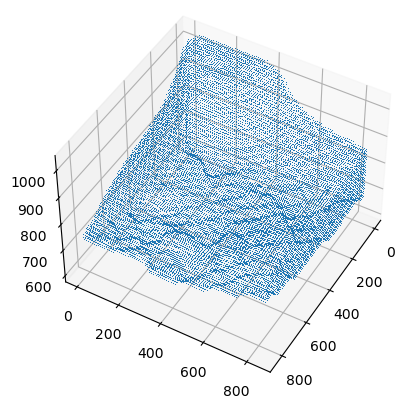

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
plt.plot(x[:,0],x[:,1],x[:,2], ",",  alpha=1)

ax.view_init(45, 30)
plt.show()

In [ ]:
xx = x[:,0]
yy = x[:,1]
zz = x[:,2]
xv, yv = np.meshgrid(xx, yy)
zv = np.meshgrid(zz)
plt.contourf(xv,yv,zv,levels=20)

In [23]:
y = x.reshape(-1,3,3)

ValueError: cannot reshape array of size 135735 into shape (3,3)

In [20]:
y

array([[[ 15.,   5., 595.,   5.,  15.],
        [595.,  25.,   5., 595.,  35.],
        [  5., 595.,  45.,   5., 595.]],

       [[ 45.,  15., 595., 235.,   5.],
        [595., 235.,  15., 595., 245.],
        [  5., 595., 245.,  15., 595.]],

       [[  5.,  25., 595.,   5.,  35.],
        [595.,  45.,  25., 595.,  45.],
        [ 35., 595., 235.,  25., 595.]],

       ...,

       [[695., 845., 895., 705., 845.],
        [895., 715., 845., 895., 735.],
        [845., 885., 725., 845., 895.]],

       [[745., 845., 885., 755., 845.],
        [885., 615., 845., 905., 625.],
        [845., 905., 635., 845., 905.]],

       [[645., 845., 905., 655., 845.],
        [905., 665., 845., 905.,   5.],
        [845., 685., 305., 305., 895.]]])

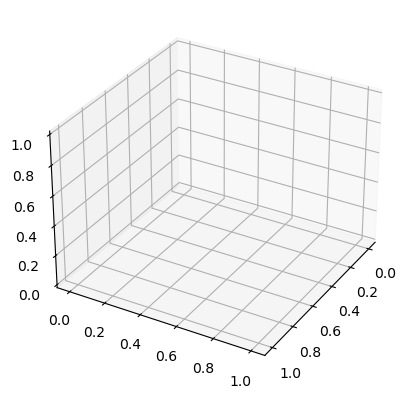

'\nimport open3d as o3d\nmcubes.export_obj(verts, faces, \'xyz.obj\')\n\nmesh = o3d.io.read_triangle_mesh("xyz.obj")\no3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)\n\n'

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import mcubes

y = x.reshape(9049,5,3)

from skimage import measure
#verts, faces, normals, values = measure.marching_cubes(b)#, spacing=(1.0, 1.0, 1.0), gradient_direction='descend')
verts, faces = mcubes.marching_cubes(b,0)


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
plt.plot(verts[:,0],verts[:,1],verts[:,2], ",",  alpha=1)

ax.view_init(30, 30)
plt.show()

'''
import open3d as o3d
mcubes.export_obj(verts, faces, 'xyz.obj')

mesh = o3d.io.read_triangle_mesh("xyz.obj")
o3d.visualization.draw_geometries([mesh], mesh_show_wireframe=True)

'''

In [43]:
verts

array([], shape=(0, 3), dtype=float64)

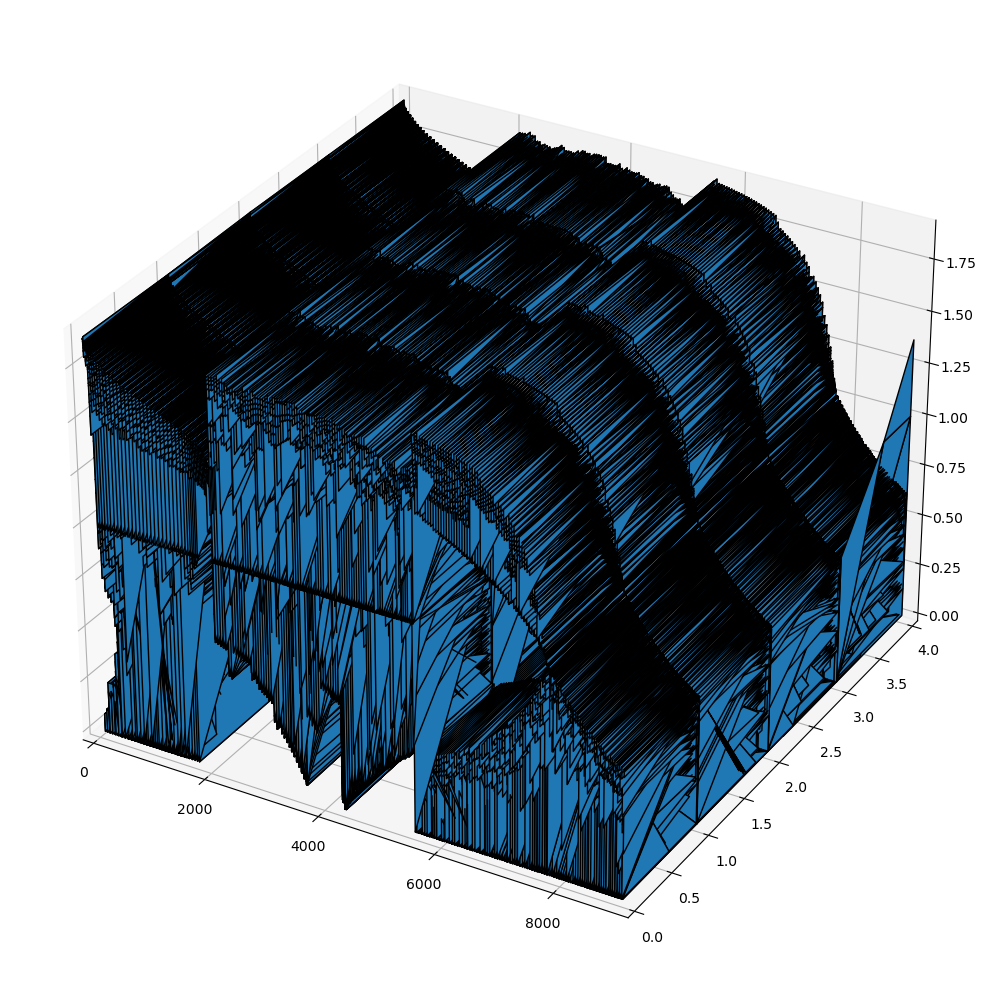

In [41]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)
ax.set_xlim(np.amin(verts[:,0]), np.amax(verts[:,0]))  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(np.amin(verts[:,1]), np.amax(verts[:,1]))  # b = 10
ax.set_zlim(np.amin(verts[:,2]), np.amax(verts[:,2]))  # c = 16
plt.tight_layout()
plt.show()

In [40]:
with np.printoptions(precision=3, suppress=True):
    print(verts.shape, verts.size, verts)

(61041, 3) 183123 [[   0.       0.       1.881]
 [   0.       1.       1.879]
 [   1.       0.       1.879]
 ...
 [9047.593    4.       1.   ]
 [9047.333    4.       0.   ]
 [9048.       4.       1.373]]


In [ ]:
np.set_printoptions(precision=3)
values

In [36]:
np.amin(verts[:,0]), np.amax(verts[:,0]),np.amin(verts[:,1]), np.amax(verts[:,1]),np.amin(verts[:,2]), np.amax(verts[:,2])

(0.0, 9048.0, 0.0, 4.0, 0.0, 1.8947369)

In [42]:
values.shape, values.size, values

((61041,),
 61041,
 array([590., 590., 590., ..., 840., 840., 600.], dtype=float32))